In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from env import host, user, password
import acquire
import prepare
import exp_mod
import report_wdate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

# inital data retrieval and analysis

In [2]:
telco_df=acquire.get_telco_data()

In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support                7043 

In [4]:
telco_df.describe(include='object').T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
online_security,7043,3,No,3498
online_backup,7043,3,No,3088
device_protection,7043,3,No,3095
tech_support,7043,3,No,3473


In [5]:
telco_df.churn

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: churn, Length: 7043, dtype: object

In [6]:
def initial_data(data):
    telco_df=acquire.get_telco_data()
    print('this data frame has',telco_df.shape[0],'rows and', telco_df.shape[1],'columns')
    print('                        ')
    print(telco_df.info())
    print('                        ')
    print(telco_df.describe())
    print('                        ')
    print(telco_df.describe(include='object').T)
    print('                        ')
    print(telco_df.columns)
    print('ended of initial report')
    print('                        ')

In [7]:
initial_data(telco_df)

this data frame has 7043 rows and 38 columns
                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection   

# Prepare Data

In [8]:
prep_telco=prepare.prep_telco(telco_df)
prep_telco

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
0,0002-ORFBO,0,9,65.60,593.30,One year,Yes,No,1,No,...,1,0,1,0,0,1,0,0,0,0
1,0003-MKNFE,0,9,59.90,542.40,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,73.90,280.85,Month-to-month,Yes,No,2,No,...,0,0,0,0,0,1,1,1,0,1
3,0011-IGKFF,1,13,98.00,1237.85,Month-to-month,Yes,No,2,No,...,0,0,1,0,1,1,1,1,0,1
4,0013-EXCHZ,1,3,83.90,267.40,Month-to-month,Yes,No,2,No,...,1,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,1,85.00,85.00,Month-to-month,Yes,Yes,2,No,...,0,0,0,0,1,1,1,1,0,0
7039,9462-MJUAW,0,4,50.40,206.60,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,0,0,1,0,0,1
7040,9705-ZJBCG,0,13,54.15,701.05,One year,Yes,No,1,Yes,...,1,0,0,0,0,0,0,0,0,0
7041,9777-IQHWP,0,64,93.40,5822.30,Two year,Yes,Yes,2,Yes,...,0,0,0,0,1,0,0,1,0,1


In [9]:
prep_telco=prep_telco.drop(columns=['phone_service.1','multiple_lines.1','internet_service_type_id.1','payment_type_id.1','online_backup.1','device_protection.1','tech_support.1','streaming_tv.1','streaming_movies.1','contract_type_id.1','paperless_billing.1','total_charges.1','monthly_charges.1','total_charges.1'],inplace=True)

In [10]:
telco_train,telco_validate,telco_test=prepare.split_telco(prep_telco)
telco_train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
440,0643-OKLRP,1,47,80.35,3825.85,Month-to-month,Yes,Yes,2,Yes,...,0,0,0,0,0,0,1,1,0,0
67,0112-QWPNC,0,49,84.35,4059.35,One year,Yes,Yes,1,Yes,...,1,0,1,0,1,0,1,0,0,1
600,0877-SDMBN,0,54,103.95,5639.05,One year,Yes,Yes,2,Yes,...,0,0,1,0,1,1,1,1,0,0
4883,5799-JRCZO,0,63,19.50,1215.10,Two year,Yes,No,3,No internet service,...,0,1,0,1,0,0,0,0,1,0
1258,6837-BJYDQ,0,3,19.60,61.35,One year,Yes,No,3,No internet service,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,6296-DDOOR,0,19,58.20,1045.25,One year,Yes,No,1,No,...,0,0,1,0,0,0,0,0,0,0
817,7629-WFGLW,1,56,95.65,5471.75,One year,Yes,Yes,2,Yes,...,1,0,0,0,0,0,0,1,0,0
901,7929-DMBCV,0,20,81.00,1683.70,Month-to-month,Yes,No,2,No,...,1,0,0,0,0,1,0,1,0,0
1987,9917-KWRBE,0,41,78.35,3211.20,One year,Yes,Yes,1,Yes,...,0,0,1,0,0,1,0,0,0,0


# Explore Data

In [11]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   contract_type                          4225 non-null   object 
 6   phone_service.1                        4225 non-null   object 
 7   multiple_lines.1                       4225 non-null   object 
 8   internet_service_type_id.1             4225 non-null   int64  
 9   online_security.1                      4225 non-null   object 
 10  online_backup.1                        4225 non-null   object 
 11  de

In [12]:

telco_train['month']=(telco_train.total_charges/telco_train.monthly_charges)
telco_validate['month']=(telco_validate.total_charges/telco_validate.monthly_charges)
telco_test['month']=(telco_test.total_charges/telco_test.monthly_charges)


In [13]:
telco_train.month.value_counts()

1.000000     369
0.000000      10
47.614810      1
10.542056      1
48.987976      1
            ... 
62.241049      1
8.218795       1
66.251527      1
72.676393      1
37.918164      1
Name: month, Length: 3848, dtype: int64

In [14]:
telco_train.month.value_counts().nunique()

3

In [15]:
telco_train.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'contract_type', 'phone_service.1', 'multiple_lines.1',
       'internet_service_type_id.1', 'online_security.1', 'online_backup.1',
       'device_protection.1', 'tech_support.1', 'streaming_tv.1',
       'streaming_movies.1', 'contract_type_id.1', 'paperless_billing.1',
       'payment_type_id.1', 'monthly_charges.1', 'total_charges.1',
       'signup_date', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_bill

In [16]:
telco_train.contract_type

440     Month-to-month
67            One year
600           One year
4883          Two year
1258          One year
             ...      
1794          One year
817           One year
901     Month-to-month
1987          One year
6958          One year
Name: contract_type, Length: 4225, dtype: object

In [17]:
telco_train[telco_train.month==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,369.0,0.130081,0.336850,0.00,0.0,0.0,0.0,1.00
tenure,369.0,1.000000,0.000000,1.00,1.0,1.0,1.0,1.00
monthly_charges,369.0,50.663686,24.890105,18.85,20.9,50.1,74.1,102.45
total_charges,369.0,50.663686,24.890105,18.85,20.9,50.1,74.1,102.45
internet_service_type_id.1,369.0,1.921409,0.788368,1.00,1.0,2.0,3.0,3.00
contract_type_id.1,369.0,1.013550,0.137250,1.00,1.0,1.0,1.0,3.00
payment_type_id.1,369.0,1.682927,0.833899,1.00,1.0,2.0,2.0,4.00
monthly_charges.1,369.0,50.663686,24.890105,18.85,20.9,50.1,74.1,102.45
partner_Yes,369.0,0.170732,0.376785,0.00,0.0,0.0,0.0,1.00
dependents_Yes,369.0,0.184282,0.388240,0.00,0.0,0.0,0.0,1.00


In [18]:
telco_train[telco_train.month>1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3846.0,0.165627,0.371793,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,3846.0,35.283411,23.528402,2.000000,13.000000,34.000000,57.000000,72.000000
monthly_charges,3846.0,65.739288,30.297604,18.400000,36.062500,71.500000,90.437500,118.750000
total_charges,3846.0,2461.375000,2238.102575,31.200000,599.475000,1627.800000,4007.650000,8684.800000
internet_service_type_id.1,3846.0,1.871815,0.735820,1.000000,1.000000,2.000000,2.000000,3.000000
contract_type_id.1,3846.0,1.758710,0.847253,1.000000,1.000000,1.000000,3.000000,3.000000
payment_type_id.1,3846.0,2.386635,1.160475,1.000000,1.000000,2.000000,3.000000,4.000000
monthly_charges.1,3846.0,65.739288,30.297604,18.400000,36.062500,71.500000,90.437500,118.750000
partner_Yes,3846.0,0.507800,0.500004,0.000000,0.000000,1.000000,1.000000,1.000000
dependents_Yes,3846.0,0.299012,0.457885,0.000000,0.000000,0.000000,1.000000,1.000000


In [19]:
telco_train[telco_train.month>1].describe().T==telco_train[telco_train.month==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,False,False,False,True,True,True,True,True
tenure,False,False,False,False,False,False,False,False
monthly_charges,False,False,False,False,False,False,False,False
total_charges,False,False,False,False,False,False,False,False
internet_service_type_id.1,False,False,False,True,True,True,False,True
contract_type_id.1,False,False,False,True,True,True,False,True
payment_type_id.1,False,False,False,True,True,True,False,True
monthly_charges.1,False,False,False,False,False,False,False,False
partner_Yes,False,False,False,True,True,False,False,True
dependents_Yes,False,False,False,True,True,True,False,True


In [20]:
telco_train[telco_train.month==1].churn_Yes.value_counts()

1    222
0    147
Name: churn_Yes, dtype: int64

In [21]:
telco_train[telco_train.churn_Yes==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,1095.0,0.255708,0.436458,0.0,0.00000,0.000000,1.000000,1.000000
tenure,1095.0,17.214612,19.137828,1.0,2.00000,9.000000,28.000000,72.000000
monthly_charges,1095.0,74.669224,24.455831,19.1,58.80000,79.650000,94.225000,118.350000
total_charges,1095.0,1481.756986,1866.510293,19.1,131.05000,633.400000,2259.125000,8684.800000
internet_service_type_id.1,1095.0,1.807306,0.511604,1.0,2.00000,2.000000,2.000000,3.000000
contract_type_id.1,1095.0,1.133333,0.408472,1.0,1.00000,1.000000,1.000000,3.000000
payment_type_id.1,1095.0,1.825571,1.103296,1.0,1.00000,1.000000,3.000000,4.000000
monthly_charges.1,1095.0,74.669224,24.455831,19.1,58.80000,79.650000,94.225000,118.350000
partner_Yes,1095.0,0.350685,0.477403,0.0,0.00000,0.000000,1.000000,1.000000
dependents_Yes,1095.0,0.165297,0.371618,0.0,0.00000,0.000000,0.000000,1.000000


In [22]:
len(telco_train[telco_train.month==1])/len(telco_train[telco_train.churn_Yes==1])

0.336986301369863

In [23]:
telco_train[telco_train.churn_Yes==0].describe().T==telco_train[telco_train.churn_Yes==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,False,False,False,True,True,True,False,True
tenure,False,False,False,False,False,False,False,True
monthly_charges,False,False,False,False,False,False,False,False
total_charges,False,False,False,False,False,False,False,False
internet_service_type_id.1,False,False,False,True,False,True,False,True
contract_type_id.1,False,False,False,True,True,False,False,True
payment_type_id.1,False,False,False,True,False,False,False,True
monthly_charges.1,False,False,False,False,False,False,False,False
partner_Yes,False,False,False,True,True,False,True,True
dependents_Yes,False,False,False,True,True,True,False,True


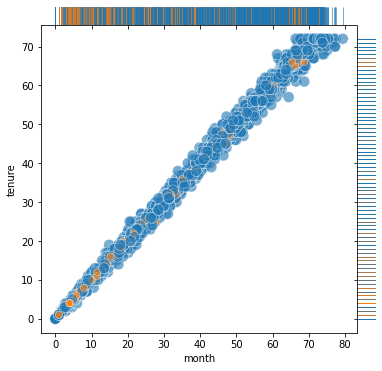

In [24]:
g=sns.JointGrid(data=telco_train, x="month", y="tenure", space=0, ratio=17,hue='churn_Yes')
g.plot_joint(sns.scatterplot, size=telco_train["churn_Yes"], sizes=(50, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

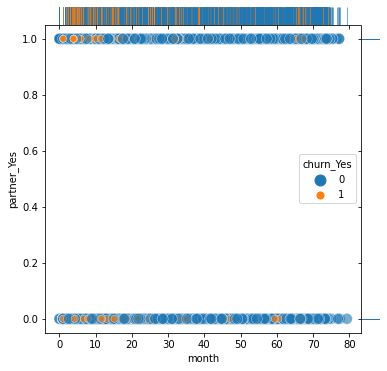

In [25]:
g=sns.JointGrid(data=telco_train, x="month", y="partner_Yes", space=0, ratio=17,hue='churn_Yes')
g.plot_joint(sns.scatterplot, size=telco_train["churn_Yes"], sizes=(50, 120),
             color="g", alpha=.6, legend=True)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)


In [26]:
telco_train_m=telco_train[telco_train.month<=1]
telco_train_m[telco_train_m.churn_Yes==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,222.0,0.198198,0.399543,0.0,0.0000,0.0,0.00,1.00
tenure,222.0,1.000000,0.000000,1.0,1.0000,1.0,1.00,1.00
monthly_charges,222.0,58.196396,24.142377,19.1,39.7625,69.3,78.35,102.45
total_charges,222.0,58.196396,24.142377,19.1,39.7625,69.3,78.35,102.45
internet_service_type_id.1,222.0,1.833333,0.668737,1.0,1.0000,2.0,2.00,3.00
contract_type_id.1,222.0,1.000000,0.000000,1.0,1.0000,1.0,1.00,1.00
payment_type_id.1,222.0,1.513514,0.765369,1.0,1.0000,1.0,2.00,4.00
monthly_charges.1,222.0,58.196396,24.142377,19.1,39.7625,69.3,78.35,102.45
partner_Yes,222.0,0.202703,0.402921,0.0,0.0000,0.0,0.00,1.00
dependents_Yes,222.0,0.162162,0.369432,0.0,0.0000,0.0,0.00,1.00


In [27]:
telco_train_m[telco_train_m.churn_Yes==1].contract_type.value_counts()

Month-to-month    222
Name: contract_type, dtype: int64

In [28]:
222/688

0.3226744186046512

In [29]:
report_wdate.signup_date_train(telco_train)
report_wdate.signup_date_val(telco_validate)
report_wdate.signup_date_test(telco_test)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,month,signup_month
941,4536-PLEQY,0,12,85.05,999.80,Month-to-month,Yes,No,2,No,...,0,0,1,1,0,1,0,1,11.755438,1
1404,9921-QFQUL,0,23,90.15,2044.95,Month-to-month,Yes,Yes,2,No,...,0,0,1,0,0,1,0,0,22.683860,2
5515,6485-QXWWE,0,62,26.00,1638.70,Two year,Yes,Yes,3,No internet service,...,0,1,0,0,0,0,1,0,63.026923,11
3684,6461-PPAXN,0,35,54.95,1916.00,One year,Yes,No,1,Yes,...,0,0,0,1,0,0,0,0,34.868062,2
7017,5993-JSUWV,0,66,61.15,4017.45,Two year,Yes,No,1,Yes,...,0,0,0,1,0,0,0,0,65.698283,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,4817-VYYWS,0,30,100.20,2983.80,Month-to-month,Yes,Yes,2,No,...,1,0,1,1,1,1,0,0,29.778443,7
5585,1465-LNTLJ,1,8,64.40,581.70,Month-to-month,Yes,No,1,No,...,0,0,1,1,0,0,0,1,9.032609,5
804,5537-UXXVS,0,20,19.25,375.25,Month-to-month,Yes,No,3,No internet service,...,0,1,0,0,0,0,1,0,19.493506,5
3190,9670-BPNXF,0,45,62.55,2796.45,One year,Yes,No,1,Yes,...,0,0,0,1,0,0,0,0,44.707434,4


In [30]:
report_wdate.compareid(telco_train).nunique()

1

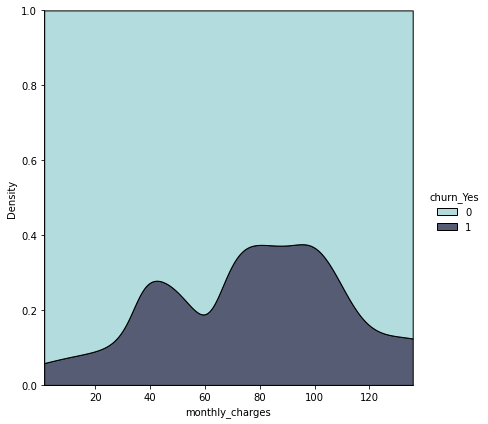

In [31]:
sns.displot(
    data=telco_train,
    x="monthly_charges", hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:xlabel='online_security_Yes', ylabel='churn_Yes'>

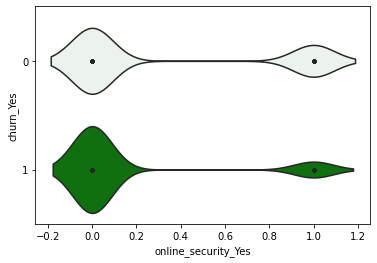

In [32]:
sns.violinplot(data=telco_train, x='online_security_Yes',y='churn_Yes',palette="light:g", inner="points", orient="h")

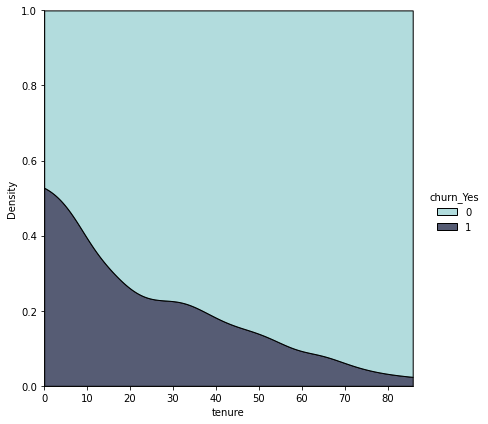

In [33]:
sns.displot(
    data=telco_train,
    x="tenure", hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

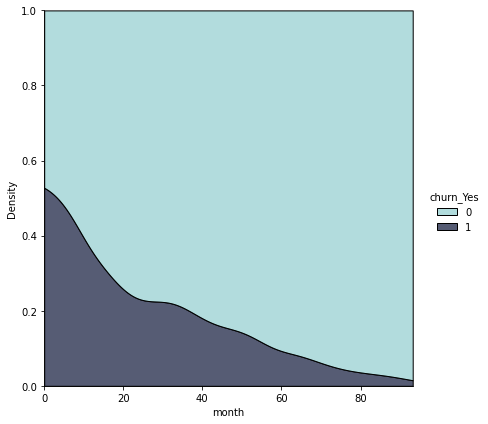

In [34]:
sns.displot(
    data=telco_train,
    x="month", hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:xlabel='signup_month', ylabel='churn_Yes'>

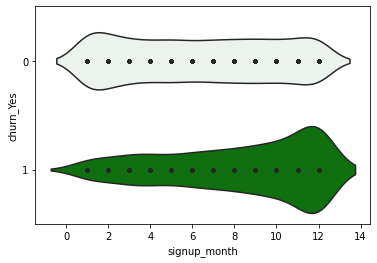

In [35]:
sns.violinplot(data=telco_train, x='signup_month',y='churn_Yes',palette="light:g", inner="points", orient="h")

<AxesSubplot:xlabel='signup_month', ylabel='month'>

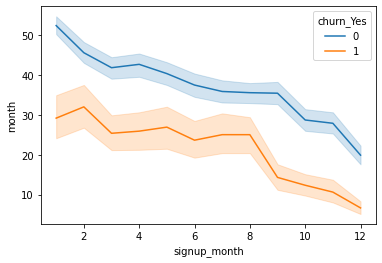

In [36]:
sns.lineplot(data=telco_train, x="signup_month", y="month",hue='churn_Yes')

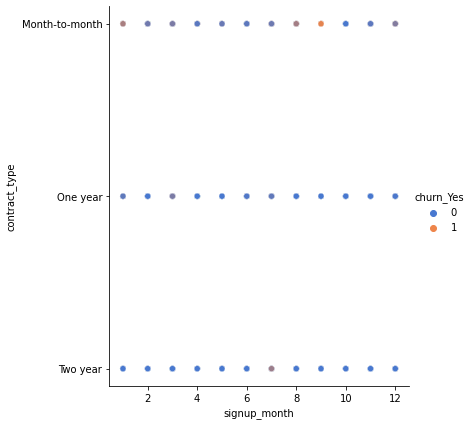

In [37]:
sns.relplot(x="signup_month", y="contract_type", hue="churn_Yes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=telco_train)

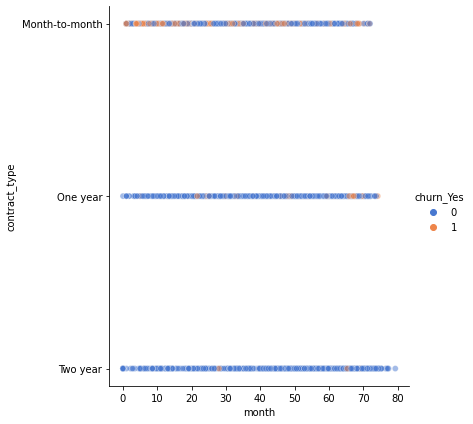

In [38]:
sns.relplot(x="month", y="contract_type", hue="churn_Yes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=telco_train)

In [39]:
stats.mannwhitneyu(telco_train.month, telco_train.tenure)

MannwhitneyuResult(statistic=8924500.0, pvalue=0.9942196255449333)

# Model

In [40]:
telco_train.churn_Yes.mode()

0    0
Name: churn_Yes, dtype: uint8

In [41]:
telco_x_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_x_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_x_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

In [42]:
(telco_y_train==0).mean()

0.7408284023668639

In [43]:
telco_train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,month,signup_month
440,0643-OKLRP,1,47,80.35,3825.85,Month-to-month,Yes,Yes,2,Yes,...,0,0,0,0,1,1,0,0,47.614810,2
67,0112-QWPNC,0,49,84.35,4059.35,One year,Yes,Yes,1,Yes,...,1,0,1,0,1,0,0,1,48.125074,12
600,0877-SDMBN,0,54,103.95,5639.05,One year,Yes,Yes,2,Yes,...,1,0,1,1,1,1,0,0,54.247715,7
4883,5799-JRCZO,0,63,19.50,1215.10,Two year,Yes,No,3,No internet service,...,0,1,0,0,0,0,1,0,62.312821,10
1258,6837-BJYDQ,0,3,19.60,61.35,One year,Yes,No,3,No internet service,...,0,1,0,0,0,0,1,1,3.130102,10


In [44]:
clf_telco = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_telco = clf_telco.fit(telco_x_train, telco_y_train)

[Text(0.5, 0.875, 'contract_type_id.1 <= 1.5\ngini = 0.384\nsamples = 4225\nvalue = [3130, 1095]'),
 Text(0.25, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.487\nsamples = 2321\nvalue = [1344, 977]'),
 Text(0.125, 0.375, 'month <= 4.189\ngini = 0.398\nsamples = 1048\nvalue = [761, 287]'),
 Text(0.0625, 0.125, 'gini = 0.489\nsamples = 417\nvalue = [240, 177]'),
 Text(0.1875, 0.125, 'gini = 0.288\nsamples = 631\nvalue = [521, 110]'),
 Text(0.375, 0.375, 'month <= 14.04\ngini = 0.496\nsamples = 1273\nvalue = [583, 690]'),
 Text(0.3125, 0.125, 'gini = 0.414\nsamples = 595\nvalue = [174, 421]'),
 Text(0.4375, 0.125, 'gini = 0.479\nsamples = 678\nvalue = [409, 269]'),
 Text(0.75, 0.625, 'monthly_charges <= 93.675\ngini = 0.116\nsamples = 1904\nvalue = [1786, 118]'),
 Text(0.625, 0.375, 'monthly_charges.1 <= 51.675\ngini = 0.065\nsamples = 1448\nvalue = [1399, 49]'),
 Text(0.5625, 0.125, 'gini = 0.019\nsamples = 746\nvalue = [739, 7]'),
 Text(0.6875, 0.125, 'gini = 0.112\nsample

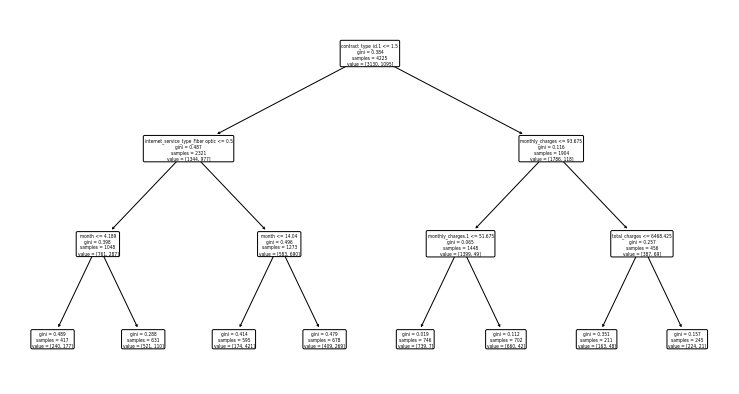

In [45]:
plt.figure(figsize=(13, 7))
plot_tree(clf_telco, feature_names=telco_x_train.columns, rounded=True)

In [46]:
telco_y_pred = pd.DataFrame({'churn': telco_y_train,'baseline': 0, 'model_1':clf_telco.predict(telco_x_train)})
telco_y_pred

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,0,0,0
1258,0,0,0
...,...,...,...
1794,0,0,0
817,0,0,0
901,0,0,0
1987,0,0,0


In [47]:
y_pred_proba = clf_telco.predict_proba(telco_x_train)
y_pred_proba[0:5]

array([[0.60324484, 0.39675516],
       [0.94017094, 0.05982906],
       [0.77251185, 0.22748815],
       [0.99061662, 0.00938338],
       [0.99061662, 0.00938338]])

In [48]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_telco.score(telco_x_train, telco_y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [49]:
confusion_matrix(telco_y_pred.churn, telco_y_pred.model_1)

array([[2956,  174],
       [ 674,  421]])

In [50]:
print(classification_report(telco_y_pred.churn,telco_y_pred.model_1))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3130
           1       0.71      0.38      0.50      1095

    accuracy                           0.80      4225
   macro avg       0.76      0.66      0.69      4225
weighted avg       0.79      0.80      0.78      4225



In [51]:
pd.DataFrame(confusion_matrix(telco_y_pred.churn, telco_y_pred.model_1), index=['actual_notchurn','acutal_churn'], columns=['prep_notchurn','prep_churn'])

,prep_notchurn,prep_churn
actual_notchurn,2956,174
acutal_churn,674,421


In [52]:
telco_TN = 2923
telco_FP = 207
telco_FN = 642
telco_TP = 453

In [53]:
telco_all = telco_TP + telco_FP + telco_FN + telco_TN
telco_acc = (telco_TP + telco_TN) / telco_all

telco_TurePositiveRate = telco_recall = telco_TP/ (telco_TP + telco_FN)

telco_FalsePositiveRate = telco_FP / (telco_FP + telco_TN)

telco_TrueNegativeRate = telco_TN / (telco_TN + telco_FP)

telco_FalseNegativeRate = telco_FN / (telco_FN + telco_TP)

telco_precision = telco_TP / (telco_TP + telco_FP)

telco_f1_score = 2 * (telco_precision*telco_recall) / (telco_precision+telco_recall)

telco_support_pos = telco_TP + telco_FN
telco_support_neg = telco_FP + telco_TN

In [54]:
print('accuracy is:',telco_acc,'Ture Positive Rate is:',telco_TurePositiveRate,'False Positive Rate is:',telco_FalsePositiveRate,'/n',
      'True Negative Rate is:',telco_TrueNegativeRate,'False Negative Rate is:',telco_FalseNegativeRate,'precision is:',telco_precision,'/n',
      'f1_score is:',telco_f1_score,'support_pos is:',telco_support_pos,'support_neg is:',telco_support_neg)

accuracy is: 0.7990532544378698 Ture Positive Rate is: 0.4136986301369863 False Positive Rate is: 0.06613418530351438 /n True Negative Rate is: 0.9338658146964857 False Negative Rate is: 0.5863013698630137 precision is: 0.6863636363636364 /n f1_score is: 0.5162393162393163 support_pos is: 1095 support_neg is: 3130


In [55]:
print(classification_report(telco_y_train, telco_y_pred.model_1))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3130
           1       0.71      0.38      0.50      1095

    accuracy                           0.80      4225
   macro avg       0.76      0.66      0.69      4225
weighted avg       0.79      0.80      0.78      4225



In [56]:
# random forest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rf.fit(telco_x_train, telco_y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [58]:
clf_telco.score(telco_x_train,telco_y_train)

0.7992899408284023

In [59]:
telco_y_predict=rf.predict(telco_x_train)

In [60]:
print(classification_report(telco_y_train,telco_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3130
           1       0.87      0.76      0.81      1095

    accuracy                           0.91      4225
   macro avg       0.89      0.86      0.87      4225
weighted avg       0.91      0.91      0.90      4225



In [61]:
confusion_matrix(telco_y_train,telco_y_predict)

array([[3003,  127],
       [ 266,  829]])

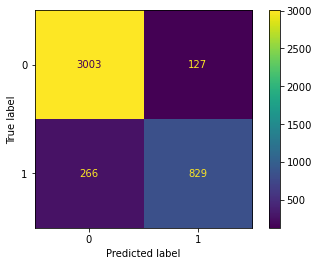

In [62]:
ConfusionMatrixDisplay(confusion_matrix(telco_y_train,telco_y_predict),display_labels=rf.classes_).plot()

In [63]:
TN = 3018
FP = 112
FN = 293
TP = 802

In [64]:
all = TP + FP + FN + TN
acc = (TP + TN) / all

TurePositiveRate = recall = TP/ (TP + FN)

FalsePositiveRate = FP / (FP + TN)

TrueNegativeRate = TN / (TN + FP)

FalseNegativeRate = FN / (FN + TP)

precision = TP / (TP + FP)

f1_score = 2 * (precision*recall) / (precision+recall)

support_pos = TP + FN
support_neg = FP + TN

In [65]:
print('accuracy is:',acc,'Ture Positive Rate is:',TurePositiveRate,'False Positive Rate is:',FalsePositiveRate,'/n',
      'True Negative Rate is:',TrueNegativeRate,'False Negative Rate is:',FalseNegativeRate,'precision is:',precision,'/n',
      'f1_score is:',f1_score,'support_pos is:',support_pos,'support_neg is:',support_neg)

accuracy is: 0.9041420118343195 Ture Positive Rate is: 0.7324200913242009 False Positive Rate is: 0.03578274760383387 /n True Negative Rate is: 0.9642172523961662 False Negative Rate is: 0.26757990867579906 precision is: 0.8774617067833698 /n f1_score is: 0.7984071677451468 support_pos is: 1095 support_neg is: 3130


In [66]:
for model in range (2,11):
    rf=RandomForestClassifier(max_depth=model, random_state=123)
    rf=rf.fit(telco_x_train,telco_y_train)
    y_predict=rf.predict(telco_x_train)
    print('model depth',model)
    print(classification_report(telco_y_train, telco_y_predict))

model depth 2
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3130
           1       0.87      0.76      0.81      1095

    accuracy                           0.91      4225
   macro avg       0.89      0.86      0.87      4225
weighted avg       0.91      0.91      0.90      4225

model depth 3
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3130
           1       0.87      0.76      0.81      1095

    accuracy                           0.91      4225
   macro avg       0.89      0.86      0.87      4225
weighted avg       0.91      0.91      0.90      4225

model depth 4
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3130
           1       0.87      0.76      0.81      1095

    accuracy                           0.91      4225
   macro avg       0.89      0.86      0.87      4225
weighted avg       0.91      0.9

In [67]:
model=[]
for num in range (2,20):
    rf=RandomForestClassifier(max_depth=num,random_state=123)
    rf=rf.fit(telco_x_train,telco_y_train)
    train_accuracy=rf.score(telco_x_train,telco_y_train)
    validate_accuracy=rf.score(telco_x_validate,telco_y_validate)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
         "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.790769,0.759404,0.031365
1,3,0.798343,0.774308,0.024035
2,4,0.808757,0.781405,0.027352
3,5,0.813491,0.783534,0.029957
4,6,0.819645,0.785664,0.033981
5,7,0.834793,0.779986,0.054807
6,8,0.851124,0.777147,0.073977
7,9,0.870296,0.782115,0.088181
8,10,0.906982,0.783534,0.123448
9,11,0.937041,0.775727,0.161314


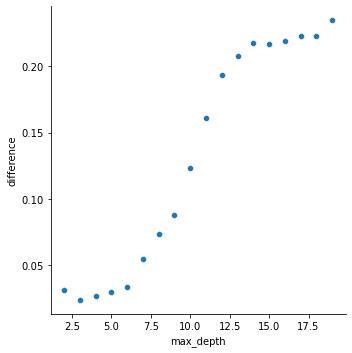

In [68]:
sns.relplot(x='max_depth',y='difference',data=test_validate)

In [69]:
model=[]
max_depth=25
for num in range (2,max_depth):
    mdepth=max_depth-num
    min_leaf=num
    rf=RandomForestClassifier(max_depth=mdepth,min_samples_leaf=min_leaf,random_state=123)
    rf=rf.fit(telco_x_train,telco_y_train)
    train_accuracy=rf.score(telco_x_train,telco_y_train)
    validate_accuracy=rf.score(telco_x_validate,telco_y_validate)
    result = {
        'min_samples_leaf':min_leaf,
        'max_depth': mdepth,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,23,0.955030,0.771469,0.183560
1,3,22,0.917633,0.770759,0.146874
2,4,21,0.896568,0.777857,0.118711
3,5,20,0.880000,0.780696,0.099304
4,6,19,0.870296,0.784244,0.086052
5,7,18,0.863195,0.781405,0.081790
6,8,17,0.856568,0.787083,0.069485
7,9,16,0.851598,0.784954,0.066644
8,10,15,0.846627,0.784244,0.062383
9,11,14,0.843077,0.782115,0.060962


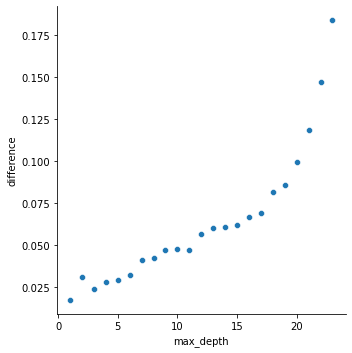

In [70]:
sns.relplot(x='max_depth',y='difference',data=test_validate)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(telco_x_train, telco_y_train)

KNeighborsClassifier()

In [72]:
y_pred= knn.predict(telco_x_train)
y_valid=knn.predict(telco_x_validate)

In [73]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(telco_x_train, telco_y_train)))

Accuracy of KNN classifier on training set: 0.83


In [74]:
model=[]
for num in range (2,20):
    knn = KNeighborsClassifier(n_neighbors=num, weights='uniform')
    knn=knn.fit(telco_x_train, telco_y_train)
    train_accuracy=knn.score(telco_x_train,telco_y_train)
    validate_accuracy=knn.score(telco_x_validate,telco_y_validate)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.866509,0.738112,0.128397
1,3,0.866982,0.729595,0.137387
2,4,0.839053,0.758694,0.080359
3,5,0.834556,0.748048,0.086508
4,6,0.824142,0.763662,0.060480
5,7,0.823432,0.765791,0.057641
6,8,0.818698,0.760114,0.058585
7,9,0.822959,0.770759,0.052199
8,10,0.817515,0.765791,0.051723
9,11,0.815148,0.762952,0.052195


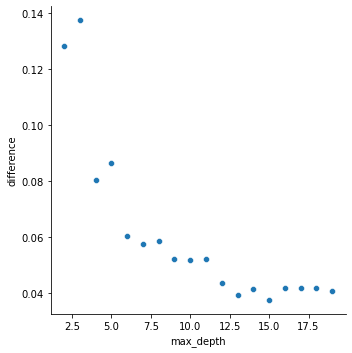

In [75]:
sns.relplot(x='max_depth',y='difference',data=test_validate)

In [76]:
model=[]
for num in range (2,20):
    knn = LogisticRegression(random_state=123)
    knn=knn.fit(telco_x_train, telco_y_train)
    train_accuracy=knn.score(telco_x_train,telco_y_train)
    validate_accuracy=knn.score(telco_x_validate,telco_y_validate)
    result = {
        "max_depth": num,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    model.append(result)
test_validate = pd.DataFrame(model)
test_validate["difference"] = test_validate.train_accuracy - test_validate.validate_accuracy
test_validate

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.803077,0.785664,0.017413
1,3,0.803077,0.785664,0.017413
2,4,0.803077,0.785664,0.017413
3,5,0.803077,0.785664,0.017413
4,6,0.803077,0.785664,0.017413
5,7,0.803077,0.785664,0.017413
6,8,0.803077,0.785664,0.017413
7,9,0.803077,0.785664,0.017413
8,10,0.803077,0.785664,0.017413
9,11,0.803077,0.785664,0.017413
